[[[0.443886786699295], [0.3505945801734924], [0.2760992050170898], [817889344.0]], [[0.356970340013504], [0.253142386674881], [0.1858686208724975], [817889344.0]], [[0.317711740732193], [0.2227185368537902], [0.1613043248653412], [817889344.0]]]
skip 9
skip 22
[[0.0029665490146726, 0.0037533147260546, 0.0059556108899414, 0.006049619987607, 0.0062492615543305, 0.0066346107050776, 0.0067633003927767, 0.0039947247132658, 0.0056937295012176, 0.0071285371668636, 0.0067200427874922, 0.006574522703886, 0.0072760409675538, 0.0080508077517151, 0.0039124730974435, 0.0075946361757814, 0.008043642155826, 0.0071801575832068, 0.0075647314079105, 0.0084881111979484, 0.0086421174928545, 0.0050912797451019, 0.007958966307342, 0.0090210298076272, 0.008004511706531, 0.008283307775855, 0.009126485325396, 0.0089536570012569, 0.0051938430406153, 0.0078737996518611, 0.0091267507523298, 0.0089949602261185, 0.0090494016185402, 0.0091147823259234, 0.0094879567623138, 0.0051971990615129, 0.0076009943149983, 0.00

TypeError: axline() missing 1 required positional argument: 'xy1'

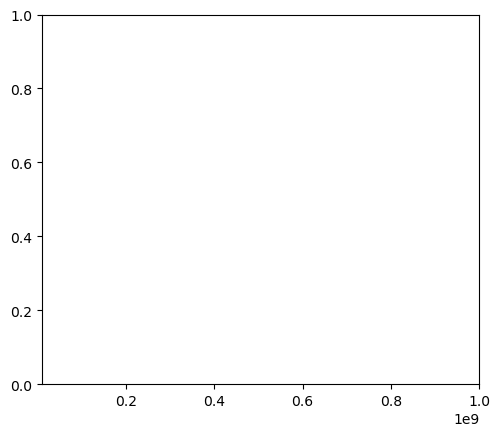

In [3]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from matplotlib import style

def filter_nan(arr): 
     """The way csv file is created for qnn networks, contain some 'nans'
    Therefore I created a function to remove 'nan' from the csv file array"""
     index =np.where( np.isnan(arr)==0)
     filter_arr = arr[index]
     return filter_arr;

def return_final_purities(file_list):
    labels = ['pur_95', 'pur_98', 'pur_99']
    pur95 = []
    pur98 = []
    pur99 = []
    purs = [pur95, pur98, pur99]
    for current_file in file_list:
        csv_path = f"{artifacts_path}{current_file}{metrics_file}"
        with open(csv_path) as file:
            metrics = pd.read_csv(file)
        for purity, label in zip (purs, labels):
            purity.append(filter_nan(np.array(metrics[label]))[-1]) # taking last value: index -1
    return purs

def return_initial_bops(file_w_bops):
    label = ['total_bops']
    csv_path = f"{file_w_bops}{metrics_file}"
    with open(csv_path) as file:
        metrics = pd.read_csv(file)
    return(filter_nan(np.array(metrics[label]))[0]) # taking first value

def purities_vs_bops(current_file):
    labels = ['pur_95', 'pur_98', 'pur_99', 'total_bops']
    pur95 = []
    pur98 = []
    pur99 = []
    bops  = []
    purs = [pur95, pur98, pur99, bops]
    csv_path = f"{artifacts_path}{current_file}{metrics_file}"
    with open(csv_path) as file:
        metrics = pd.read_csv(file)
        pruned_array = filter_nan(np.array(metrics["pruned"]))
        index_list = []
        last_pruned = 0
        for i in range(len(pruned_array)):
            if(pruned_array[i] > last_pruned):
                index_list.append(i-1)
            last_pruned = pruned_array[i]
        for purity, label in zip (purs, labels):
            if index_list == []:
                purity.append(filter_nan(np.array(metrics[label]))[-1]) # taking last value: index -1
            for index in index_list :
                purity.append(filter_nan(np.array(metrics[label]))[index]) # taking last value: index -1
    return purs

def purities_bops_vs_config(sweep_dir, num_scans, config_key, skip=[]):
    labels = ['pur_95', 'pur_98', 'pur_99', 'total_bops']
    pur95 = []
    pur98 = []
    pur99 = []
    bops = []
    config = []
    purs = [pur95, pur98, pur99, bops]
    for i in range(num_scans):
        if i in skip:
            print(f"skip {i}")
            continue
        current_file = f"{sweep_dir}{i}/"
        yaml_path = f"{artifacts_path}{current_file}{yaml_file}"
        csv_path = f"{artifacts_path}{current_file}{metrics_file}"
        with open(csv_path) as file:
            metrics = pd.read_csv(file)
        for purity, label in zip (purs, labels):
            purity.append(filter_nan(np.array(metrics[label]))[-1]) # taking last value: index -1
        with open(yaml_path) as file:
            all_configs = yaml.load(file, Loader=yaml.FullLoader)
            config.append(all_configs[config_key])
                #print(f"config_key: {config_key} all_configs[config_key]: {all_configs[config_key]}")
    purs.append(config)
    return purs

def purities_bops_vs_configs(sweep_dir, num_scans, config_keys, skip=[]):
    labels = ['pur_95', 'pur_98', 'pur_99', 'total_bops']
    pur95 = []
    pur98 = []
    pur99 = []
    bops = []
    config = []
    purs = [pur95, pur98, pur99, bops]
    for i in range(num_scans):
        if i in skip:
            print(f"skip {i}")
            continue
        configs = []
        current_file = f"{sweep_dir}{i}/"
        yaml_path = f"{artifacts_path}{current_file}{yaml_file}"
        csv_path = f"{artifacts_path}{current_file}{metrics_file}"
        with open(csv_path) as file:
            metrics = pd.read_csv(file)
        for purity, label in zip (purs, labels):
            purity.append(filter_nan(np.array(metrics[label]))[-1]) # taking last value: index -1
        with open(yaml_path) as file:
            all_configs = yaml.load(file, Loader=yaml.FullLoader)
            for config_key in config_keys:
                configs.append(all_configs[config_key])
                #print(f"config_key: {config_key} all_configs[config_key]: {all_configs[config_key]}")
        config.append(configs)
    purs.append(config)
    return purs

def replace_bops(pur_file, replace_dir, num_scans, config_keys, skip=[]):
    output_list = pur_file
    for bops, config in zip (output_list[3], output_list[4]):    # config is [4]
        print(f"config: {config}")
        for i in range(num_scans):
            if i in skip:
                print(f"skip {i}")
                continue
            current_file = f"{replace_dir}{i}/"
            yaml_path = f"{artifacts_path}{current_file}{yaml_file}"
            with open(yaml_path) as file:
                all_configs = yaml.load(file, Loader=yaml.FullLoader)
                found = True
                for config_key, config_value in zip (config_keys, config):
                    if(all_configs[config_key] != config_value):
                        found = False
                if found:
                    csv_path = f"{artifacts_path}{current_file}"
                    print(f"found_config: {yaml_path}")
                    bops = return_initial_bops(csv_path)
                    continue
    return output_list


# some constants we need
zoom = True

max_epoch = 30
min_xlim = 0
max_bits = 24
min_ylim = [0, 0, 1e-3, 1e-3]
if(zoom):
    min_ylim = [0, 0.95, 1e-3, 1e-3] # for zoom
max_ylim = [0.2, 1, 0.1, 0.1]

linestyles = ['solid', 'densely dotted', 'densely dashed', 'densely dashdotted']
markerstyles = ['o', '^', 'v', 's']
labelloc = [4, 4, 1, 1]

# file lists
artifacts_path = "../../artifacts/chep/metric_learning/"

metrics_file = "metrics.csv"
yaml_file  = "hparams.yaml"

# standard MLP ones
mlp_reference = "reference/version_8/"
mlp_batchnorm = "batchnorm/version_0/"
mlp_batch_noNorm = "batchnorm_no_norm/version_0/"
# pruning of standard MLP
mlp_prune_unstructured_noL1     = "batchnorm_no_norm_prune_unstructured_noL1/version_0/"
mlp_prune_unstructured_wL1      = "batchnorm_no_norm_prune_unstructured_noL1/version_1/"
mlp_prune_structured_wL1_dim1   = "batchnorm_no_norm_prune_structured_wL1/version_1/"
mlp_prune_structured_noL1       = "batchnorm_no_norm_prune_structured_noL1/version_0/"
mlp_prune_structured_wL1_dim0   = "batchnorm_no_norm_prune_structured_wL1/version_2/"
# input quantization in standard MLP; these are sweeps, to be seen how to do!
mlp_input_integer    = "batchnorm_no_norm_inputQuant_integer/version_"
mlp_input_fractional = "batchnorm_no_norm_inputQuant_frac/version_"
# activation quantization: sweep
qmlp_activation_sweep = "batchnorm_no_norm_QMLP_sweep_act/version_"
qmlp_activation_sweep_replace_bops_dir = "batchnorm_no_norm_QMLP_sweep_act_bops/version_"


files_mlp = [mlp_reference, mlp_batchnorm, mlp_batch_noNorm]
files_mlp_pruned = [mlp_prune_unstructured_noL1, 
                    mlp_prune_unstructured_wL1, 
                    mlp_prune_structured_wL1_dim1, 
                    mlp_prune_structured_noL1, 
                    mlp_prune_structured_wL1_dim0]      
label_files_mlp = ["MLP Layernorm w Normalization",
                   "MLP Batchnorm w Normalization",
                   "MLP Batchnorm w/o Normalization"]
label_files_mlp_prune = ["L1 unstructured, no L1 loss", 
                         "L1 unstructured, with L1 loss", 
                         "L1 structured (dim = 1), with L1 loss",
                         "L1 structured (dim = 1), no L1 loss",
                         "L1 structured (dim = 0), with L1 loss"]
# QMLP: quantized weights and activations, no bias!


obs = {0:"val_loss",
       1:"eff",
       2:"pur",
       3:"current_lr",
       4:"R95",
       5:"R98",
       6:"R99",
       7:"pur_95",
       8:"pur_98",
       9:"pur_99",
       10:"total_bops",
       11:"total_mem_w_bits",
       12:"total_mem_o_bits",
       13:"pruned",
       14:"epoch",
       15:"step",
       16:"train_loss"
      }
label_obs = {0:"Validation loss",
             1:"Efficiency",
             2:"Purity",
             3:"Current learning rate",
             4:"Radius for 95% efficiency",
             5:"Radius for 98% efficiency",
             6:"Radius for 99% efficiency",
             7:"Purity at 95% efficiency",
             8:"Purity at 98% efficiency",
             9:"Purity at 99% efficiency",
             10:"BOPs per cluster/event",
             11:"Memory bits (weights)",
             12:"Memory bits (output, per cluster)",
             13:"Number of pruning steps",
             14:"Epoch",
             15:"Training step",
             16:"Training loss"
      }

reference_purities = return_final_purities(files_mlp)
ref_vs_bops = []
for file in files_mlp:
    ref_vs_bops.append(purities_vs_bops(file))
pur_vs_bops = []
for file in files_mlp_pruned:
    pur_vs_bops.append(purities_vs_bops(file))
#print(pur_vs_bops[0][0]) #[file][metric]
print(ref_vs_bops)

pur_vs_int = purities_bops_vs_config(mlp_input_integer, 8, "integer_part")
pur_vs_fra = purities_bops_vs_config(mlp_input_fractional, 26, "fractional_part", skip=[9,22])
pur_qmlp_activation_sweep = purities_bops_vs_configs(qmlp_activation_sweep, 
                                                 337, 
                                                 ["activation_bit_width_input", 
                                                  "activation_bit_width_hidden",
                                                  "activation_bit_width_output"], 
                                                  skip=[])
print(pur_qmlp_activation_sweep)
"""pur_qmlp_activation_sweep = replace_bops(pur_qmlp_activation_sweep, 
                                         qmlp_activation_sweep,
                                         #qmlp_activation_sweep_replace_bops_dir, 
                                         240, 
                                         ["activation_bit_width_input", 
                                         "activation_bit_width_hidden",
                                         "activation_bit_width_output"], 
                                         skip=[])"""
print(pur_qmlp_activation_sweep)

print(pur_vs_int)
print(pur_vs_fra)

purity_labels = [label_obs[7], label_obs[8], label_obs[9]]
reference = ref_vs_bops[2]

fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax1.axline(y=reference[0], linestyle = 'dashed', color = "gray", label = "teste")
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]

# references only
for pur_file, graph_label in zip(ref_vs_bops, label_files_mlp):
    for ax, lab, pur in zip (ax_list, purity_labels, pur_file):
        ax.set_ylabel(lab)
        ax.set_xscale('log')
        ax.set_ylim(0,0.5)
        ax.set_xlim(1e7,1e9)
        ax.set_xlabel("BOPs / cluster")
        ax.plot(pur_file[3],pur, label = graph_label, alpha=1, marker = "o", linestyle="None") #, linestyle=linestyles[idfile%3], marker = markerstyles[idfile%3]) ##plotting )
        ax.legend(loc=2, prop={'size': 10})

fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]

# references with lines
for pur_file, graph_label in zip(ref_vs_bops, label_files_mlp):
    for ax, lab, pur in zip (ax_list, purity_labels, pur_file):
        ax.set_ylabel(lab)
        ax.set_xscale('log')
        ax.set_ylim(0,0.5)
        ax.set_xlim(1e7,1e9)
        ax.set_xlabel("BOPs / cluster")
        ax.plot(pur_file[3],pur, label = graph_label, alpha=1, marker = "o", linestyle="None") #, linestyle=linestyles[idfile%3], marker = markerstyles[idfile%3]) ##plotting )
        for pur_values in pur:
            ax.axhline(y=pur_values, linestyle = 'dashed', color = "gray", label = "teste")
        ax.legend(loc=2, prop={'size': 10})


fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]

# pruned MLP with references
for pur_file, graph_label  in zip(pur_vs_bops, label_files_mlp_prune):
    for ax, lab, pur, ref_pur in zip (ax_list, purity_labels, pur_file, reference):
        ax.set_ylabel(lab)
        ax.set_xscale('log')
        ax.set_ylim(0,0.5)
        ax.set_xlim(1e7,1e9)
        ax.set_xlabel("BOPs / cluster")
        ax.plot(pur_file[3],pur, label = graph_label, alpha=1) #, linestyle=linestyles[idfile%3], marker = markerstyles[idfile%3]) ##plotting )
        ax.axhline(y=ref_pur, linestyle = 'dashed', color = "gray", label = "teste")
        ax.legend(loc=2, prop={'size': 10})

fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]    
for ax, lab, pur, ref_pur in zip (ax_list, purity_labels, pur_vs_int, reference):
    ax.set_ylabel(lab)
    ax.set_ylim(0,0.5)
#    ax.set_xlim(1e7,1e9)
    ax.set_xlabel("integer part")
    ax.plot(pur_vs_int[4],pur, label = "test", alpha=1, linestyle="None", marker = "o") ##plotting )
    ax.axhline(y=ref_pur, linestyle = 'dashed', color = "gray", label = "teste")
    ax.legend(loc=2, prop={'size': 10})

fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]    
for ax, lab, pur, ref_pur  in zip (ax_list, purity_labels, pur_vs_fra, reference):
    ax.set_ylabel(lab)
    ax.set_ylim(0,0.5)
#    ax.set_xlim(1e7,1e9)
    ax.set_xlabel("fractional part")
    ax.plot(pur_vs_fra[4],pur, label = "test", alpha=1, linestyle="None", marker = "o") ##plotting )
    ax.axhline(y=ref_pur, linestyle = 'dashed', color = "gray", label = "teste")
    ax.legend(loc=2, prop={'size': 10})

fig = plt.figure(figsize=(19.2,4.8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax_list = [ax1, ax2, ax3]    
for ax, lab, pur, ref_pur  in zip (ax_list, purity_labels, pur_qmlp_activation_sweep, reference):
    ax.set_ylabel(lab)
    ax.set_xscale('log')
    ax.set_ylim(0,0.5)
    ax.set_xlim(1e7,1e9)
    ax.set_xlabel("BOPs / cluster")
    ax.plot(pur_qmlp_activation_sweep[3], pur, label = "tets", alpha=1, linestyle="None", marker = "o") ##plotting )
    ax.axhline(y=ref_pur, linestyle = 'dashed', color = "gray", label = "teste")
    ax.legend(loc=2, prop={'size': 10})    

